<a href="https://colab.research.google.com/github/GVilok/ml/blob/main/labsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Labsheet3


Saving employee_data.csv to employee_data.csv

 Centroid of Category X (Male): [101.90322581  40.93548387   0.          44.55913978]

 Centroid of Category Y (Female): [99.28037383 41.14018692  1.         47.00934579]

 Spread of Category X (Male): [58.98785146 12.08557031  0.          9.31042236]

 Spread of Category Y (Female): [5.71482340e+01 1.16525555e+01 1.11544763e-16 9.23742932e+00]

 Interclass Distance between Male and Female groups: 3.7315901846783186


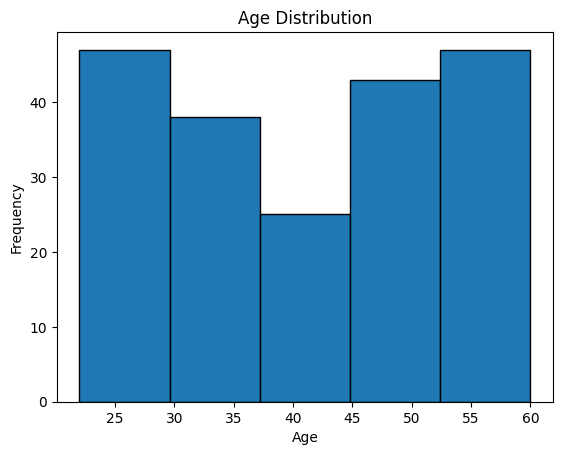


 Mean of Age: 41.045

 Variance of Age: 139.162975


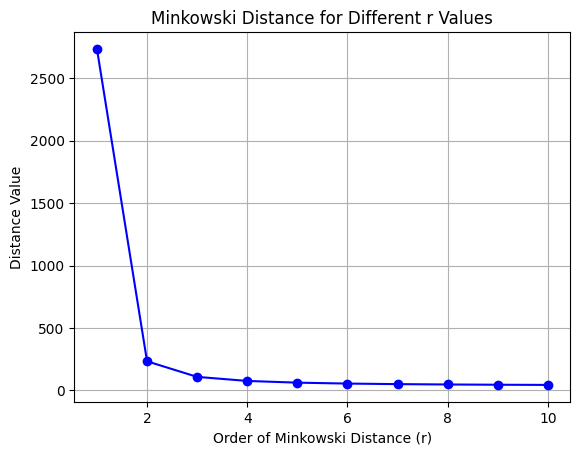


 Training Set Shape (X_train): (140, 3)
 Testing Set Shape (X_test): (60, 3)
 Training Labels Shape (y_train): (140,)
 Testing Labels Shape (y_test): (60,)

 Accuracy Score: 0.4

 First 15 Predicted Labels: [1 1 1 0 1 0 0 0 1 1 0 1 0 1 1]
 First 15 Actual Labels: [1 1 0 0 1 1 1 1 0 0 1 1 1 0 1]


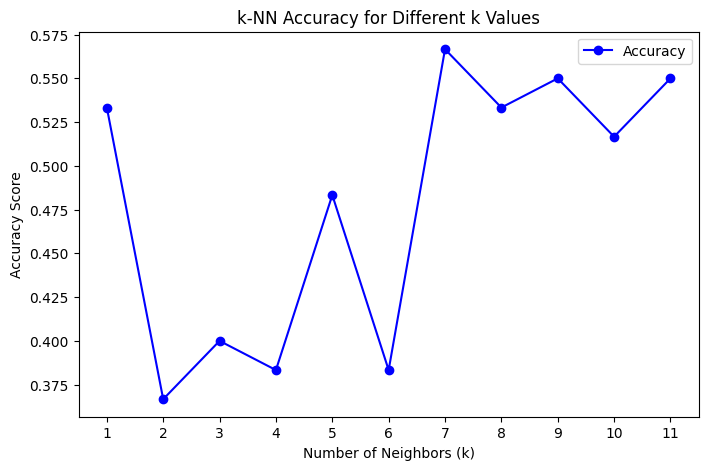


 Confusion Matrix (Training Data):
 [[56 16]
 [20 48]]

 Confusion Matrix (Test Data):
 [[ 6 15]
 [21 18]]

 Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        72
           1       0.75      0.71      0.73        68

    accuracy                           0.74       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.74      0.74      0.74       140


 Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.22      0.29      0.25        21
           1       0.55      0.46      0.50        39

    accuracy                           0.40        60
   macro avg       0.38      0.37      0.38        60
weighted avg       0.43      0.40      0.41        60



In [1]:
# ✅ Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files  # Google Colab File Upload
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Upload the CSV file (Google Colab)
uploaded = files.upload()

# ✅ Extract the uploaded filename dynamically
file_name = list(uploaded.keys())[0]

# ✅ Load the dataset
data = pd.read_csv(file_name, encoding="utf-8")

# ✅ Ensure all columns are correctly formatted
data = data.apply(pd.to_numeric, errors="coerce").fillna(0)

# ✅ Split into categories based on Gender
category_x = data[data["Gender"] == 0]  # Male
category_y = data[data["Gender"] == 1]  # Female

# ✅ Select numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_x = category_x[numeric_columns]
data_y = category_y[numeric_columns]

# ✅ Compute Centroids and Spreads
centroid_x = data_x.mean(axis=0)
centroid_y = data_y.mean(axis=0)
spread_x = data_x.std(axis=0)
spread_y = data_y.std(axis=0)

distance = np.linalg.norm(centroid_x - centroid_y)

print("\n Centroid of Category X (Male):", np.array(centroid_x))
print("\n Centroid of Category Y (Female):", np.array(centroid_y))
print("\n Spread of Category X (Male):", np.array(spread_x))
print("\n Spread of Category Y (Female):", np.array(spread_y))
print("\n Interclass Distance between Male and Female groups:", distance)

# ✅ Histogram for Age
selected_feature = data["Age"]

def compute_statistics(feature_column):
    avg_value = np.mean(feature_column)
    var_value = np.var(feature_column)
    return avg_value, var_value

def draw_histogram(values, num_bins):
    plt.hist(values, bins=num_bins, edgecolor="black")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Age Distribution")
    plt.show()

draw_histogram(selected_feature, 5)

stat_results = compute_statistics(selected_feature)
print("\n Mean of Age:", stat_results[0])
print("\n Variance of Age:", stat_results[1])

# ✅ Minkowski Distance Calculation
feature1 = data["Age"].values
feature2 = data["Weekly_Work_Hours"].values

def minkowski_distance(vec1, vec2, r):
    return np.linalg.norm(vec1 - vec2, ord=r)

r_values = range(1, 11)
distances = [minkowski_distance(feature1, feature2, r) for r in r_values]

plt.plot(r_values, distances, marker="o", linestyle="-", color="b")
plt.xlabel("Order of Minkowski Distance (r)")
plt.ylabel("Distance Value")
plt.title("Minkowski Distance for Different r Values")
plt.grid()
plt.show()

# ✅ Preparing Data for KNN
numeric_data = ["Age", "Id", "Weekly_Work_Hours"]
X = data[numeric_data]
y = data["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n Training Set Shape (X_train):", X_train.shape)
print(" Testing Set Shape (X_test):", X_test.shape)
print(" Training Labels Shape (y_train):", y_train.shape)
print(" Testing Labels Shape (y_test):", y_test.shape)

# ✅ KNN Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# ✅ Model Accuracy
score = neigh.score(X_test, y_test)
print("\n Accuracy Score:", score)

# ✅ Predictions
y_predict = neigh.predict(X_test)
print("\n First 15 Predicted Labels:", y_predict[:15])
print(" First 15 Actual Labels:", y_test.values[:15])

# ✅ KNN Accuracy for Different k values
k_values = range(1, 12)
accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("k-NN Accuracy for Different k Values")
plt.xticks(k_values)
plt.legend()
plt.show()

# ✅ Confusion Matrix and Classification Report
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\n Confusion Matrix (Training Data):\n", train_cm)
print("\n Confusion Matrix (Test Data):\n", test_cm)

print("\n Classification Report (Training Data):\n", classification_report(y_train, y_train_pred))
print("\n Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
